# Reading Bronhouderportaal BRO data

This notebook introduces how to use the `hydropandas` package to read, visualise and analyse meta data of newly installed groundwater wells. These meta data is to be submitted to Bronhouderportaal BRO afterwards.

## <a id=top></a>Notebook contents

1. [Read ObsCollection](#readingOC)
2. [Visualise ObsCollection](#visualize)
3. [Analyse ObsCollection](#analyse)

In [1]:
import pandas as pd

import hydropandas as hpd

In [2]:
hpd.util.get_color_logger("INFO")

<RootLogger root (INFO)>

## Read ObsCollection<a id=readingOC></a>

An `ObsCollection` is created for the multiple monitoring wells.

In [3]:
dirname = "data/bronhouderportaal-bro"
oc = hpd.read_bronhouderportaal_bro(dirname, full_meta=True, add_to_df=True)
oc

,x,y,filename,source,unit,monitoring_well,tube_nr,screen_top,screen_bottom,ground_level,...,constructionStandard,tubeGlue,artesianWellCapPresent,plainTubePartLength,wellHeadProtector,objectIdAccountableParty,owner,tube_bottom,tubeMaterial,variableDiameter
name,,,,,,,,,,,,,,,,,,,,,
GROND5_B1-1#000-1,56525.207,386749.698,GROND5_B1-1.xml,bronhouderportaal-bro,m NAP,GROND5_B1-1#000,1,-10.64,-11.64,0.36,...,NEN5766,geen,ja,11.50,kokerNietMetaal,B1-1,111,-12.64,pvc,nee
GROND5_B1-1#000-2,56525.207,386749.698,GROND5_B1-1.xml,bronhouderportaal-bro,m NAP,GROND5_B1-1#000,2,-1.14,-2.14,0.36,...,NEN5766,geen,ja,2.21,kokerNietMetaal,B1-1,111,-3.14,pvc,nee
GROND5_B1-2#000-1,56336.522,386967.299,GROND5_B1-2.xml,bronhouderportaal-bro,m NAP,GROND5_B1-2#000,1,-9.33,-10.33,1.67,...,NEN5766,geen,ja,11.49,kokerNietMetaal,B1-2,111,-11.33,pvc,nee
GROND5_B1-2#000-2,56336.522,386967.299,GROND5_B1-2.xml,bronhouderportaal-bro,m NAP,GROND5_B1-2#000,2,0.17,-0.83,1.67,...,NEN5766,geen,ja,2.17,kokerNietMetaal,B1-2,111,-1.83,pvc,nee
GROND5_B1-3#000-1,56349.209,387156.262,GROND5_B1-3.xml,bronhouderportaal-bro,m NAP,GROND5_B1-3#000,1,-9.70,-10.70,1.30,...,NEN5766,geen,ja,11.44,kokerNietMetaal,B1-3,111,-11.70,pvc,nee
GROND5_B1-3#000-2,56349.209,387156.262,GROND5_B1-3.xml,bronhouderportaal-bro,m NAP,GROND5_B1-3#000,2,-0.20,-1.20,1.30,...,NEN5766,geen,ja,2.20,kokerNietMetaal,B1-3,111,-2.20,pvc,nee


## Visualize ObsCollection<a id=visualize></a>

Visualize the `ObsCollection`.

In [ ]:
oc.plots.interactive_map(popup_width=350)

INFO:hydropandas.extensions.plots:no iplot available for GROND5_B1-1#000-2
INFO:hydropandas.extensions.plots:no iplot available for GROND5_B1-2#000-2
INFO:hydropandas.extensions.plots:no iplot available for GROND5_B1-3#000-2


INFO:hydropandas.extensions.plots:created sectionplot -> GROND5_B1-3#000-2


(<Figure size 1500x500 with 1 Axes>, [<Axes: ylabel='m NAP'>])

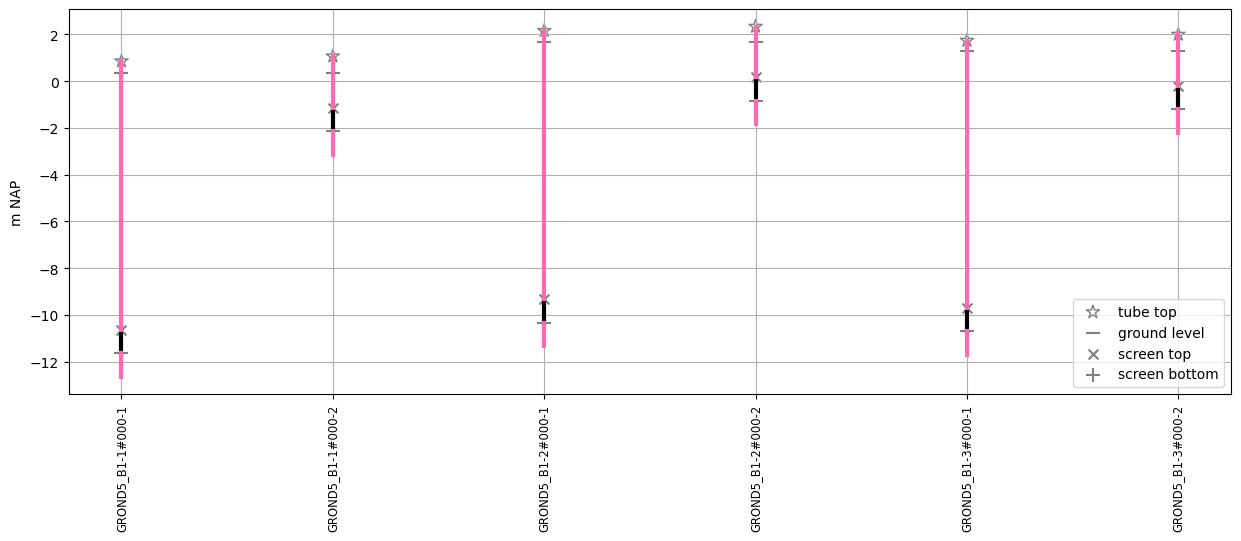

In [5]:
oc.plots.section_plot(plot_obs=False)

## Analyse ObsCollection<a id=analyse></a>

Visualize the `ObsCollection`.

First step is to check which columns have unique values for all wells. E.g. the owner should be the same for all wells. That requires that we drop the `obs` column, beceause `pd.nunique` cannot deal with that specific HydroPandas column-type.

In [6]:
oc_temp = oc.copy().drop(["obs"], axis=1)
oc_unique = oc_temp.iloc[0][oc_temp.columns[oc_temp.nunique() <= 1]]
oc_unique

source                              bronhouderportaal-bro
unit                                                m NAP
metadata_available                                   True
initialFunction                                     stand
sedimentSumpLength                                    1.0
deliveryAccountableParty                              111
screenLength                                          1.0
deliveredVerticalPosition_offset                      0.0
horizontalPositioningMethod                RTKGPS5tot10cm
localVerticalReferencePoint                           NAP
tubeStatus                                  gebruiksklaar
qualityRegime                                       IMBRO
tubeTopDiameter_unit                                   mm
groundLevelStable                                      ja
sockMaterial                                         geen
sedimentSumpPresent                                    ja
tubeTopPositioningMethod                   RTKGPS4tot10cm
tubeType      

In [7]:
oc_non_unique = oc[oc.columns.drop(oc_temp.columns[oc_temp.nunique() <= 1])]
oc_non_unique

,x,y,filename,monitoring_well,tube_nr,screen_top,screen_bottom,ground_level,tube_top,obs,wellConstructionDate,plainTubePartLength,objectIdAccountableParty,tube_bottom,lat,lon
name,,,,,,,,,,,,,,,,
GROND5_B1-1#000-1,56525.207,386749.698,GROND5_B1-1.xml,GROND5_B1-1#000,1,-10.64,-11.64,0.36,0.86,GroundwaterObs GROND5_B1-1#000-1 -----metadata...,2020-06-23,11.50,B1-1,-12.64,51.461207,3.970150
GROND5_B1-1#000-2,56525.207,386749.698,GROND5_B1-1.xml,GROND5_B1-1#000,2,-1.14,-2.14,0.36,1.07,GroundwaterObs GROND5_B1-1#000-2 -----metadata...,2020-06-23,2.21,B1-1,-3.14,51.461207,3.970150
GROND5_B1-2#000-1,56336.522,386967.299,GROND5_B1-2.xml,GROND5_B1-2#000,1,-9.33,-10.33,1.67,2.16,GroundwaterObs GROND5_B1-2#000-1 -----metadata...,2020-06-18,11.49,B1-2,-11.33,51.463129,3.967375
GROND5_B1-2#000-2,56336.522,386967.299,GROND5_B1-2.xml,GROND5_B1-2#000,2,0.17,-0.83,1.67,2.34,GroundwaterObs GROND5_B1-2#000-2 -----metadata...,2020-06-18,2.17,B1-2,-1.83,51.463129,3.967375
GROND5_B1-3#000-1,56349.209,387156.262,GROND5_B1-3.xml,GROND5_B1-3#000,1,-9.70,-10.70,1.30,1.74,GroundwaterObs GROND5_B1-3#000-1 -----metadata...,2020-06-22,11.44,B1-3,-11.70,51.464829,3.967504
GROND5_B1-3#000-2,56349.209,387156.262,GROND5_B1-3.xml,GROND5_B1-3#000,2,-0.20,-1.20,1.30,2.00,GroundwaterObs GROND5_B1-3#000-2 -----metadata...,2020-06-22,2.20,B1-3,-2.20,51.464829,3.967504


In [8]:
# get statistics
oc_non_unique.describe()

,x,y,tube_nr,screen_top,screen_bottom,ground_level,tube_top,plainTubePartLength,tube_bottom,lat,lon
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000
mean,56403.646000,386957.753000,1.500000,-5.140000,-6.140000,1.110000,1.69500,6.835000,-7.140000,51.463055,3.968343
std,94.331533,181.971242,0.547723,5.238309,5.238309,0.604053,0.60252,5.084749,5.238309,0.001621,0.001401
min,56336.522000,386749.698000,1.000000,-10.640000,-11.640000,0.360000,0.86000,2.170000,-12.640000,51.461207,3.967375
25%,56339.693750,386804.098250,1.000000,-9.607500,-10.607500,0.595000,1.23750,2.202500,-11.607500,51.461687,3.967407
50%,56349.209000,386967.299000,1.500000,-5.235000,-6.235000,1.300000,1.87000,6.825000,-7.235000,51.463129,3.967504
75%,56481.207500,387109.021250,2.000000,-0.435000,-1.435000,1.577500,2.12000,11.477500,-2.435000,51.464404,3.969489
max,56525.207000,387156.262000,2.000000,0.170000,-0.830000,1.670000,2.34000,11.500000,-1.830000,51.464829,3.970150


Check the usage of `tube_nr`. Has tube number one the lowest `screen_bottom` and lowest `screen_top`?

In [ ]:
lst_lowest_tube = []
for location in oc.location.unique():
    oc_mw = oc.loc[oc.location == location]

    lowest_screen_bottom_tube_nr = oc_mw.loc[
        oc_mw.screen_bottom == oc_mw.screen_bottom.min(), "tube_nr"
    ].values[0]

    lowest_screen_top_tube_nr = oc_mw.loc[
        oc_mw.screen_top == oc_mw.screen_top.min(), "tube_nr"
    ].values[0]

    lst_lowest_tube.append(
        [location, lowest_screen_bottom_tube_nr, lowest_screen_top_tube_nr]
    )

df_lowest_tube = pd.DataFrame(
    lst_lowest_tube,
    columns=[
        "location",
        "lowest_screen_bottom_tube_nr",
        "lowest_screen_top_tube_nr",
    ],
).set_index("location")

df_lowest_tube

,lowest_screen_bottom_tube_nr,lowest_screen_top_tube_nr
monitoring_well,,
GROND5_B1-1#000,1,1
GROND5_B1-2#000,1,1
GROND5_B1-3#000,1,1


## Upload to Bronhouderportaal BRO

Upload the XML-files to Bronhouderportaal BRO via the website.